In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
from fastai.vision.all import *

## Create DataLoaders object

In [2]:
# Save current working directory as pathlib.Path object
path = Path("../input/covid19-radiography-database/COVID-19_Radiography_Dataset")
path

Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset')

In [3]:
# List all files in path
path.ls()

(#9) [Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal.metadata.xlsx'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/README.md.txt'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID.metadata.xlsx'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID')]

In [4]:
# Grab file names recursively
fnames = get_image_files(path)
fnames

(#21165) [Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-859.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-158.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-10121.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-1811.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-97.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-1088.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-5663.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-6328.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-8410.png'),Path('../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/Normal-5641.png')...]

In [5]:
# Function for binary labelling
def label_func(fname):
    if parent_label(fname)=="Lung_Opacity":
        return 0
    if parent_label(fname)=="Normal":
        return 0
    if parent_label(fname)=="Viral Pneumonia":
        return 0
    else:
        return 1

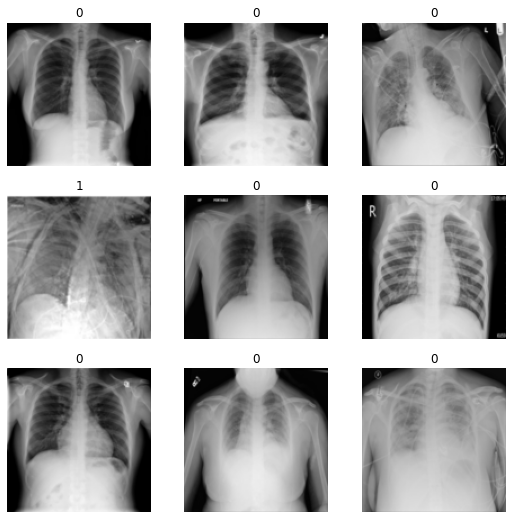

In [7]:
# Construct the DataLoaders object
dbl = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                get_y     = label_func,
                splitter  = RandomSplitter(valid_pct=0.2, seed=42),
                item_tfms = Resize(128))

dls = dbl.dataloaders(fnames)
dls.show_batch()

In [8]:
len(dls.train_ds), len(dls.valid_ds)

(16932, 4233)

## Baseline model

In [9]:
# Use a pre-trained model (resnet18) and transfer learn it on chest x-rays.
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.388399,0.237128,0.094496,0.905504,01:56


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.124930,0.063672,0.022443,0.977557,01:17
1,0.065703,0.058079,0.018190,0.981810,01:16
2,0.036527,0.050978,0.017954,0.982046,01:16
3,0.010080,0.031245,0.007560,0.992440,01:15
4,0.004671,0.029972,0.006851,0.993149,01:16
5,0.003091,0.028225,0.006615,0.993385,01:16


## Export the baseline model for deployment

In [10]:
# Export model to pickle file
learn.export('binary_model.pkl')

In [ ]:
# Load exported model for deployment 
learn_inf = load_learner("../input/covidmodel/binary_model.pkl") 

# Predict COVID on a test image
learn_inf.predict('../input/.jpg')

## Improve the baseline model (WIP)

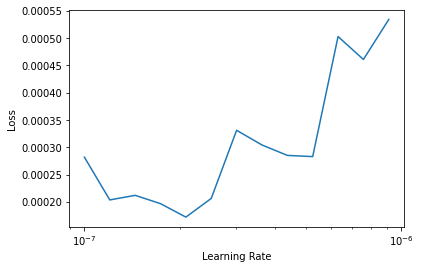

In [13]:
# Find best learning rate
lr_min, lr_steep = learn.lr_find()

In [14]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 7.59e-08, steepest point: 6.31e-07


## Interpret the model (WIP)

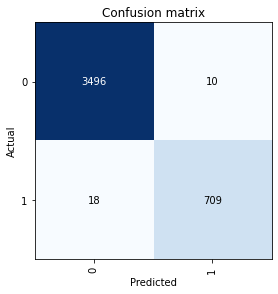

In [11]:
# Confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
# False negatives
18/709

# Precision
# Recall
# Comparison to other test means

0.02538787023977433